In [2]:
# PS4 - CE264
# GSI: Mustapha Harb, Mengqiao Yu, Andrew Campbell
# Authors: Chenglong Li, Junzhe Shi, and Franklin Zhao

# importing the requried libraries
from collections import OrderedDict    # For recording the model specification 

import pandas as pd                    # For file input/output
import numpy as np                     # For vectorized math operations

import pylogit as pl                   # For MNL model estimation and
                                       # conversion from wide to long format
    
# reading the data file 
data_wide  = pd.read_csv("data01.csv",sep=",")

In [3]:
# converting the data from wide to long format

# Create the list of individual specific variables
ind_variables = data_wide.columns.tolist()[:2] + ["weights"]

# Specify the variables that vary across individuals and some or all alternatives
# The keys are the column names that will be used in the long format dataframe.
# The values are dictionaries whose key-value pairs are the alternative id and
# the column name of the corresponding column that encodes that variable for
# the given alternative. Examples below.
alt_varying_variables = {u'travel_time': dict([(1, 'tt_da'),
                                               (2, 'tt_sr'),
                                               (3, 'tt_walk'),
                                               (4, 'tt_bike'),
                                               (5, 'tt_wt'),
                                               (6, 'tt_dt')]),
                          u'distance_car': dict([(1, 'dist_car'),
                                                (2, 'dist_car')]),
                          u'travel_cost': dict([(1, 'cost_da'),
                                                (2, 'cost_sr'),
                                                (5, 'cost_wt'),
                                                (6, 'cost_dt')]),
                          u'access_time': dict([(5, 'accTime_wt'),
                                                (6, 'accTime_dt')]),
                          u'egress_time': dict([(5, 'egrTime_wt'),
                                                (6, 'egrTime_dt')]),
                          u'initial_wait': dict([(5, 'iWait_wt'),
                                                 (6, 'iWait_dt')]),
                          u'transfer_wait': dict([(5, 'xWait_wt'),
                                                  (6, 'xWait_dt')]),
                          u'access_distance_dt': dict([(6, "accDist_dt")])}

# Specify the availability variables
# Note that the keys of the dictionary are the alternative id's.
# The values are the columns denoting the availability for the
# given mode in the dataset.


availability_variables = {1: 'avail_da',
                          2: 'avail_sr', 
                          3: 'avail_walk',
                          4: 'avail_bike',
                          5: 'avail_wt',
                          6: 'avail_dt'}

##########
# Determine the columns for: alternative ids, the observation ids and the choice
##########
# The 'custom_alt_id' is the name of a column to be created in the long-format data
# It will identify the alternative associated with each row.
custom_alt_id = "mode_id"

# Create a custom id column that ignores the fact that this is a 
# panel/repeated-observations dataset. Note the +1 ensures the id's start at one.
obs_id_column = "obsID"

# Create a variable recording the choice column
choice_column = "choice"

In [4]:
# Perform the conversion to long-format
data_long = pl.convert_wide_to_long(data_wide, 
                                           ind_variables, 
                                           alt_varying_variables, 
                                           availability_variables, 
                                           obs_id_column, 
                                           choice_column,
                                           new_alt_id_name=custom_alt_id)
# Look at the resulting long-format dataframe
data_long.head(37921).T
#len(data_long)

,0,1,2,3,4,5,6,7,8,9,...,37911,37912,37913,37914,37915,37916,37917,37918,37919,37920
obsID,1.0000,1.00000,2.0000,2.0000,2.00,2.000,3.0000,3.0000,3.000,4.0000,...,9997.00000,9997.00,9997.00,9997.00,9998.0000,9998.0000,9998.00,9999.0000,9999.0000,9999.00
mode_id,1.0000,2.00000,1.0000,2.0000,4.00,6.000,1.0000,2.0000,6.000,1.0000,...,2.00000,3.00,5.00,6.00,1.0000,2.0000,6.00,1.0000,2.0000,6.00
choice,1.0000,0.00000,0.0000,1.0000,0.00,0.000,1.0000,0.0000,0.000,0.0000,...,0.00000,1.00,0.00,0.00,1.0000,0.0000,0.00,1.0000,0.0000,0.00
originTAZ,1308.0000,1308.00000,1269.0000,1269.0000,1269.00,1269.000,342.0000,342.0000,342.000,627.0000,...,1009.00000,1009.00,1009.00,1009.00,601.0000,601.0000,601.00,601.0000,601.0000,601.00
destTAZ,1300.0000,1300.00000,1284.0000,1284.0000,1284.00,1284.000,429.0000,429.0000,429.000,583.0000,...,1019.00000,1019.00,1019.00,1019.00,426.0000,426.0000,426.00,426.0000,426.0000,426.00
weights,21.0000,21.00000,51.5000,51.5000,51.50,51.500,37.0000,37.0000,37.000,137.0000,...,92.00000,92.00,92.00,92.00,83.5000,83.5000,83.50,83.5000,83.5000,83.50
initial_wait,0.0000,0.00000,0.0000,0.0000,0.00,24.000,0.0000,0.0000,24.000,0.0000,...,0.00000,0.00,4.89,7.50,0.0000,0.0000,21.57,0.0000,0.0000,24.00
travel_time,33.8500,33.85000,31.7100,31.7100,47.81,16.705,70.7700,70.7700,86.355,31.4800,...,21.70000,23.97,3.27,5.00,49.8000,49.8000,18.00,49.8000,49.8000,18.00
travel_cost,1.9765,0.98824,2.5306,1.2653,0.00,4.240,6.8065,3.4032,6.010,2.6929,...,0.14294,0.00,2.12,1.66,4.1929,2.0965,4.00,4.1929,2.0965,4.00
egress_time,0.0000,0.00000,0.0000,0.0000,0.00,26.350,0.0000,0.0000,39.620,0.0000,...,0.00000,0.00,17.80,26.87,0.0000,0.0000,32.52,0.0000,0.0000,28.42


In [5]:
##########
# Create scaled variables so the estimated coefficients are of similar magnitudes
##########
# Scale the travel time column by 60 to convert raw units (minutes) to hours
data_long["travel_time_hrs"] = data_long["travel_time"] / 60.0

# Scale the access by 60 to convert raw units (minutes) to hours
data_long["access_time_hrs"] = data_long["access_time"] / 60.0

# for drive to transit let us combine travel time and access time
data_long["travel_time_access_time_hrs"] = data_long["travel_time_hrs"] + data_long["access_time_hrs"]

#Scale the egress time by 60
data_long["egress_time_hrs"] = data_long["egress_time"] / 60.0

# combining access and egress time which we want to use for the walk to transit alternative
data_long["acess_egress_hrs"] = data_long["access_time_hrs"] + data_long["egress_time_hrs"]

# scaling the initial wait by 60
data_long["initial_wait_hrs"] = data_long["initial_wait"] / 60.0

# scaling the transfer wait by 60
data_long["transfer_wait_hrs"]  = data_long["transfer_wait"] / 60.0

# combining transfer wait and initial wait to be used for walk to transit and bike to transit
data_long["initial_transfer_wait_hrs"] = data_long["initial_wait_hrs"] + data_long["transfer_wait_hrs"]

# Consider the toll effect
toll = 10
data_long["travel_cost_toll"] = data_long["travel_cost"] + ((data_long["originTAZ"] <= 42) | (data_long["destTAZ"] <= 42)).astype(int) * \
                                ((data_long["mode_id"] == 1) | (data_long["mode_id"] == 2)).astype(int) * toll

# creating non-linear transformations for the cost variable
cutOff1 = 2
cutOff2 = 7

# ex: 1 become: cat1: 1; cat 2: 0; cat3: 0
# ex: 3 become: cat1: 2; cat 2: 1; cat3: 0
# ex: 7 become: cat1: 2; cat 2: 5; cat3: 0
# ex: 9 become: cat1: 2; cat 2: 5; cat3: 2
data_long["cost_cat_one"] = (data_long["travel_cost"] <= cutOff1)*data_long["travel_cost"] + \
                            (data_long["travel_cost"] > cutOff1)*cutOff1

data_long["cost_cat_two"] = (data_long["travel_cost"] > cutOff1)*(data_long["travel_cost"] <= cutOff2)*(data_long["travel_cost"] - cutOff1)\
                          + (data_long["travel_cost"] > cutOff2)* (cutOff2 - cutOff1)

data_long["cost_cat_three"] = (data_long["travel_cost"] > cutOff2)*(data_long["travel_cost"] - cutOff2)



# specifying the utility equations

# NOTE: - Specification and variable names must be ordered dictionaries.
#       - Keys should be variables within the long format dataframe.
#         The sole exception to this is the "intercept" key.
#       - For the specification dictionary, the values should be lists
#         of integers or or lists of lists of integers. Within a list, 
#         or within the inner-most list, the integers should be the 
#         alternative ID's of the alternative whose utility specification 
#         the explanatory variable is entering. Lists of lists denote 
#         alternatives that will share a common coefficient for the variable
#         in question.

basic_specification = OrderedDict()
basic_names = OrderedDict()


basic_specification["intercept"] = [ 2, 3, 4, 5, 6]
basic_names["intercept"] = ['ASC SR',
                            'ASC Walk', 'ASC Bike', 'ASC WT', 'ASC DT']

basic_specification["travel_time_hrs"] = [[1, 2, 5], 4, 3]
basic_names["travel_time_hrs"] = ['In-Vehicle Travel Time, units:hrs (DA, SR, WT)',
                                  'Bike Time, units:hrs (Bike)',
                                  'Walk Time, units:hrs (Walk)']

basic_specification["travel_time_access_time_hrs"] = [6]
basic_names["travel_time_access_time_hrs"] = ["In-Vehicle Travel Time, units:hrs, (DT)"]

basic_specification["acess_egress_hrs"] = [5]
basic_names["acess_egress_hrs"] = ["Walk Time, units:hrs, (WT)"]

basic_specification["egress_time_hrs"] = [6]
basic_names["egress_time_hrs"] = ["Walk Time, units:hrs, (DT)"]

basic_specification["initial_transfer_wait_hrs"] = [[5, 6]]
basic_names["initial_transfer_wait_hrs"] = ["Waiting Time, units:hrs, (WT and DT)"]


basic_specification["cost_cat_one"] = [[1, 2, 5,6]]
basic_names["cost_cat_one"] = ['Cost: Under $2']

basic_specification["cost_cat_two"] = [[1, 2, 5,6]]
basic_names["cost_cat_two"] = ['Cost: (2 - 7)$']

basic_specification["cost_cat_three"] = [[1, 2, 5,6]]
basic_names["cost_cat_three"] = ['Cost: Above $7']



/Users/franklin/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [7]:
# taking a sample of 10,000 observation from the BATS 2000 dataset
new_data = data_long.loc[data_long[obs_id_column].isin(range(10000))].copy()

In [8]:
# Estimate the multinomial logit model (MNL)
data_mnl = pl.create_choice_model(data=new_data,
                                  alt_id_col=custom_alt_id,
                                  obs_id_col=obs_id_column,
                                  choice_col=choice_column,
                                  specification=basic_specification,
                                  model_type="MNL",
                                  names=basic_names)

# Specify the initial values and method for the optimization.
data_mnl.fit_mle(np.zeros(15))



Log-likelihood at zero: -12,766.7933
Initial Log-likelihood: -12,766.7933


/Users/franklin/anaconda3/envs/py27/lib/python2.7/site-packages/scipy/optimize/_minimize.py:420: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.84 seconds.
Final log-likelihood: -8,020.8080


In [13]:
# Look at the estimation results
bestmodel = data_mnl.get_statsmodels_summary()
bestmodel

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      choice   No. Observations:                9,999
Model:             Multinomial Logit Model   Df Residuals:                    9,984
Method:                                MLE   Df Model:                           15
Date:                     Mon, 05 Mar 2018   Pseudo R-squ.:                   0.372
Time:                             23:43:55   Pseudo R-bar-squ.:               0.371
AIC:                            16,071.616   Log-Likelihood:             -8,020.808
BIC:                            16,179.770   LL-Null:                   -12,766.793
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
ASC SR                                            -2.1158      0.049    -43.217      0.000      -2.212      -2.020
ASC Walk                                          -2.5376      0.187    -13.546      0.000      -2.905      -2.170
ASC Bike                                          -3.4882      0.185    -18.852      0.000      -3.851      -3.126
ASC WT                                             1.5572      0.154     10.133      0.000       1.256       1.858
ASC DT                                            -0.8970      0.183     -4.893      0.000      -1.256      -0.538
In-Vehicle Travel Time, units:hrs (DA, SR, WT)    -1.9053      0.094    -20.306      0.000      -2.089      -1.721
Bike Time, units:hrs (Bike)                       -4.7177      0.361    -13.058      0.000      -5.426      -4.010
Walk Time, units:hrs (Walk)                       -1.1014      0.122     -9.012      0.000      -1.341      -0.862
In-Vehicle Travel Time, units:hrs, (DT)           -1.2238      0.121    -10.149      0.000      -1.460      -0.987
Walk Time, units:hrs, (WT)                        -3.1670      0.227    -13.968      0.000      -3.611      -2.723
Walk Time, units:hrs, (DT)                        -5.2712      0.384    -13.732      0.000      -6.024      -4.519
Waiting Time, units:hrs, (WT and DT)              -2.6341      0.225    -11.705      0.000      -3.075      -2.193
Cost: Under $2                                    -1.2832      0.064    -20.084      0.000      -1.408      -1.158
Cost: (2 - 7)$                                    -0.3359      0.019    -17.883      0.000      -0.373      -0.299
Cost: Above $7                                    -0.0781      0.010     -7.976      0.000      -0.097      -0.059
==================================================================================================================
"""

In [17]:
bestmodel.tables[0].as_latex_tabular()

'\\begin{center}\n\\begin{tabular}{lclc}\n\\toprule\n\\textbf{Dep. Variable:} &          choice         & \\textbf{  No. Observations:  } &    9,999     \\\\\n\\textbf{Model:}         & Multinomial Logit Model & \\textbf{  Df Residuals:      } &    9,984     \\\\\n\\textbf{Method:}        &           MLE           & \\textbf{  Df Model:          } &      15      \\\\\n\\textbf{Date:}          &     Mon, 05 Mar 2018    & \\textbf{  Pseudo R-squ.:     } &    0.372     \\\\\n\\textbf{Time:}          &         23:43:55        & \\textbf{  Pseudo R-bar-squ.: } &    0.371     \\\\\n\\textbf{AIC:}           &        16,071.616       & \\textbf{  Log-Likelihood:    } &  -8,020.808  \\\\\n\\textbf{BIC:}           &        16,179.770       & \\textbf{  LL-Null:           } & -12,766.793  \\\\\n\\bottomrule\n\\end{tabular}\n%\\caption{Multinomial Logit Model Regression Results}\n\\end{center}'

In [10]:
# prediction - sample enumeration
# array of probabilities for each available alternative for all individuals in the new_data file that 
# was used for estimation
#toll = 10
#data_long["toll_dummy"] = (data_long["originTAZ"] <= 42) | (data_long["destTAZ"] <= 42)
#data_long["travel_cost_toll"] = data_long["travel_cost"]

#new_data["travel_cost"] = new_data["travel_cost"] + ((new_data["originTAZ"] <= 42) | (new_data["destTAZ"] <= 42)).astype(int) * \
#                                ((new_data["mode_id"] == 1) | (new_data["mode_id"] == 2)).astype(int) * toll
new_data["cost_cat_one"] = (new_data["travel_cost_toll"] <= cutOff1)*new_data["travel_cost_toll"] + \
                            (new_data["travel_cost_toll"] > cutOff1)*cutOff1
new_data["cost_cat_two"] = (new_data["travel_cost_toll"] > cutOff1)*(new_data["travel_cost_toll"] <= cutOff2)*(new_data["travel_cost_toll"] - cutOff1)\
                          + (new_data["travel_cost_toll"] > cutOff2)* (cutOff2 - cutOff1)

new_data["cost_cat_three"] = (new_data["travel_cost_toll"] > cutOff2)*(new_data["travel_cost_toll"] - cutOff2)

prediction_array = data_mnl.predict(new_data)
#pd.set_option('display.max_columns', 100)
#new_data.head(100).T
emission = []
emission = np.empty(9999)
for obs in range(1, 10000):
    tot_emission = (new_data["obsID"] == obs).astype(int) * (new_data["mode_id"] == 1).astype(int) * new_data["weights"] * \
    new_data["distance_car"] * prediction_array
    tot_emission = tot_emission + (new_data["obsID"] == obs).astype(int) * (new_data["mode_id"] == 2).astype(int) * new_data["weights"] * \
    new_data["distance_car"] * prediction_array /2
    tot_emission = 0.916 * tot_emission
    emission[obs - 1] = np.sum(tot_emission)

emission_tot = np.sum(emission)

In [11]:
# check out the probabilities
prediction_array[0:20]
emission_tot

16438268.584912855

In [12]:
# market shares
# the following script performs sample enumeration for all alternatives by catering for individual weights 

total_weights = np.sum(data_wide.loc[:9999, 'weights'])
weights = new_data["weights"] / total_weights

alternative_names = ["drive", "shared ride", "walk", "bike",
                     "walk transit", "drive transit"]
num_alternatives = data_long["mode_id"].unique().size
market_shares = np.empty(num_alternatives)
for i in range(1, 7):
    filter_condition = (new_data["mode_id"] == i).values
    num_obs_in_condition = filter_condition.sum()
    current_weights = weights[filter_condition]
    assert current_weights.size == num_obs_in_condition
    current_alternative_share = prediction_array[filter_condition].dot(current_weights)
    market_shares[i - 1] = current_alternative_share
    
pd.Series(market_shares, index=alternative_names)

drive            0.612445
shared ride      0.216046
walk             0.021139
bike             0.016362
walk transit     0.088664
drive transit    0.045270
dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot configurations
%matplotlib inline
#plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 150
#plt.rc('text', usetex=True)
sns.set()

In [26]:
p2a = pd.read_csv('2a.csv').set_index('Toll($)')
p2a

,drive alone,shared drive,walk,bike,walk transit,drive transit
Toll($),,,,,,
0,0.631724,0.224905,0.017962,0.014922,0.070864,0.039549
1,0.625117,0.220704,0.019581,0.015552,0.078338,0.040634
2,0.621775,0.218869,0.020270,0.015827,0.081754,0.041431
3,0.619725,0.217952,0.020531,0.015984,0.083658,0.042077
4,0.617890,0.217331,0.020741,0.016118,0.085213,0.042632
5,0.616337,0.216945,0.020907,0.016222,0.086398,0.043116
6,0.615252,0.216656,0.021029,0.016280,0.087142,0.043567
7,0.614468,0.216474,0.021077,0.016307,0.087597,0.044004
8,0.613772,0.216327,0.021099,0.016326,0.087968,0.044433


In [111]:
p2a.to_latex()

u'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  drive alone &  shared drive &      walk &      bike &  walk transit &  drive transit \\\\\nToll(\\$) &              &               &           &           &               &                \\\\\n\\midrule\n0       &     0.631724 &      0.224905 &  0.017962 &  0.014922 &      0.070864 &       0.039549 \\\\\n1       &     0.625117 &      0.220704 &  0.019581 &  0.015552 &      0.078338 &       0.040634 \\\\\n2       &     0.621775 &      0.218869 &  0.020270 &  0.015827 &      0.081754 &       0.041431 \\\\\n3       &     0.619725 &      0.217952 &  0.020531 &  0.015984 &      0.083658 &       0.042077 \\\\\n4       &     0.617890 &      0.217331 &  0.020741 &  0.016118 &      0.085213 &       0.042632 \\\\\n5       &     0.616337 &      0.216945 &  0.020907 &  0.016222 &      0.086398 &       0.043116 \\\\\n6       &     0.615252 &      0.216656 &  0.021029 &  0.016280 &      0.087142 &       0.043567 \\\\\n7       &     0.614468 &      0.21

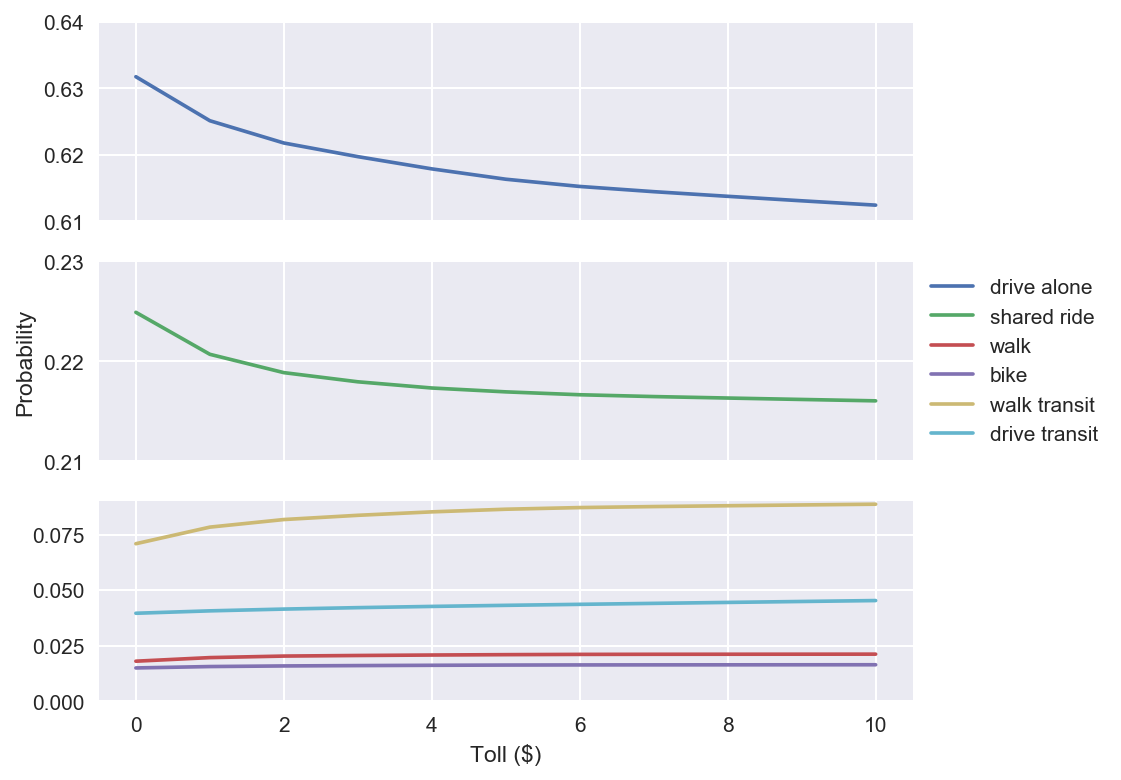

In [120]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(7,6))
label = ['drive alone', 'shared ride', 'walk', 'bike', 'walk transit', 'drive transit']
for i in range(6):
    ax1.plot(p2a.iloc[:, i], label=label[i])
ax1.set_xticklabels([])
ax1.set_ylim([0.61,0.64])
#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for i in range(6):
    ax2.plot(p2a.iloc[:, i], label=label[i])
ax2.set_ylim([0.21,0.23])
ax2.set_xticklabels([])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_ylabel('Probability')
for i in range(6):
    ax3.plot(p2a.iloc[:, i])
ax3.set_ylim([0,0.09])
ax3.set_xlabel('Toll ($)')
plt.show()

In [122]:
p3a = pd.read_csv('3a.csv').set_index('Toll ($)')
p3a

,Emission,Reduction,Percentage
Toll ($),,,
0,16770830,0,0.00%
1,16701468,69362,0.41%
2,16656403,114427,0.68%
3,16619952,150878,0.90%
4,16586270,184560,1.10%
5,16556207,214623,1.28%
6,16530295,240535,1.43%
7,16506326,264504,1.58%
8,16483230,287600,1.71%


In [123]:
p3a.to_latex()

u'\\begin{tabular}{lrrl}\n\\toprule\n{} &  Emission &  Reduction & Percentage \\\\\nToll (\\$) &           &            &            \\\\\n\\midrule\n0        &  16770830 &          0 &      0.00\\% \\\\\n1        &  16701468 &      69362 &      0.41\\% \\\\\n2        &  16656403 &     114427 &      0.68\\% \\\\\n3        &  16619952 &     150878 &      0.90\\% \\\\\n4        &  16586270 &     184560 &      1.10\\% \\\\\n5        &  16556207 &     214623 &      1.28\\% \\\\\n6        &  16530295 &     240535 &      1.43\\% \\\\\n7        &  16506326 &     264504 &      1.58\\% \\\\\n8        &  16483230 &     287600 &      1.71\\% \\\\\n9        &  16460507 &     310323 &      1.85\\% \\\\\n10       &  16438269 &     332561 &      1.98\\% \\\\\n\\bottomrule\n\\end{tabular}\n'

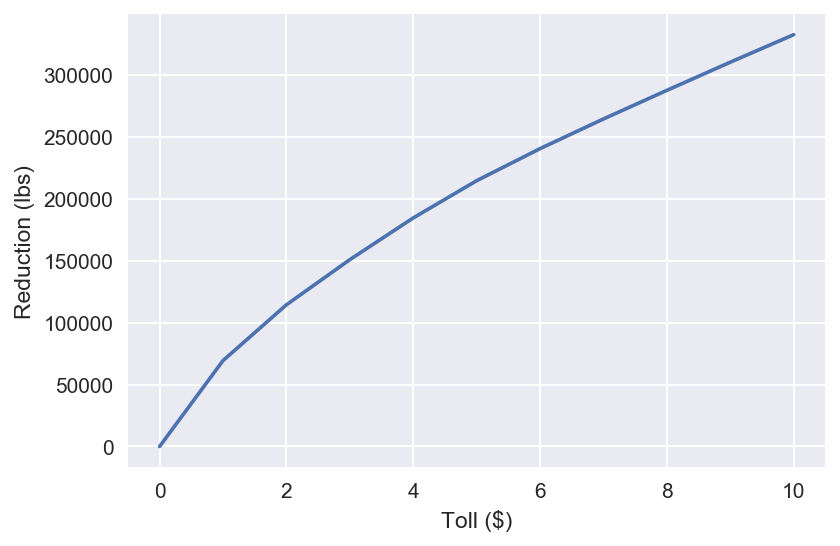

In [128]:
plt.plot(p3a.iloc[:, 1])
plt.xlabel('Toll ($)')
plt.ylabel('Reduction (lbs)')
plt.show()

In [126]:
p3a.iloc[:, 1]

Toll ($)
0          0
1      69362
2     114427
3     150878
4     184560
5     214623
6     240535
7     264504
8     287600
9     310323
10    332561
Name: Reduction, dtype: int64

In [136]:
jsurvey=pd.read_csv('jsurvey.csv')
jsurvey.reset_index(drop = True, inplace = True)
jsurvey.to_latex(index=False)

u'\\begin{tabular}{llllr}\n\\toprule\nTime for finding a parking carport &     Distance & If the weather is good & If there is a hill &  Choose bike or others? \\\\\n\\midrule\n                        0 - 5 mins &   0- 2 miles &                      Y &                  Y &                     NaN \\\\\n                       5 - 10 mins &  2 - 4 miles &                      Y &                  Y &                     NaN \\\\\n                         >10 mins  &  4 - 6 miles &                      Y &                  Y &                     NaN \\\\\n                        0 - 5 mins &   0- 2 miles &                      N &                  N &                     NaN \\\\\n                       5 - 10 mins &  2 - 4 miles &                      N &                  N &                     NaN \\\\\n                          >10 mins &  4 - 6 miles &                      N &                  N &                     NaN \\\\\n\\bottomrule\n\\end{tabular}\n'